In [1]:
import pandas as pd

In [2]:
# Loading the Data
data_frame=pd.read_csv('Churn_Modelling.csv')

In [3]:
# Check for missing values
missing_values = data_frame.isnull().sum()

In [4]:
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Step 4: Handling Categorical Variables
# One-hot encoding for 'Geography' and 'Gender'
data_frame = pd.get_dummies(data_frame, columns=['Geography', 'Gender'], drop_first=True)
categorized_columns = data_frame.filter(regex='^Geography_|^Gender_').columns

In [8]:
print(data_frame[categorized_columns].head())

   Geography_Germany  Geography_Spain  Gender_Male
0              False            False        False
1              False             True        False
2              False            False        False
3              False            False        False
4              False             True        False


In [10]:
from sklearn.preprocessing import StandardScaler
# Step 5: Feature Scaling
# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data_frame[numerical_features] = scaler.fit_transform(data_frame[numerical_features])

In [11]:
data_frame.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,False,False,False
1,2,15647311,Hill,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,True,False
2,3,15619304,Onio,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,False,False,False
3,4,15701354,Boni,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,False,False,False
4,5,15737888,Mitchell,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,True,False


In [16]:
# Drop non-numeric columns that aren't useful for correlation calculation
non_numeric_columns = ['RowNumber', 'CustomerId', 'Surname']
data_frame = data_frame.drop(columns=non_numeric_columns)

In [17]:
data_frame.corr()['Exited']

CreditScore         -0.027094
Age                  0.285323
Tenure              -0.014001
Balance              0.118533
NumOfProducts       -0.047820
HasCrCard           -0.007138
IsActiveMember      -0.156128
EstimatedSalary      0.012097
Exited               1.000000
Geography_Germany    0.173488
Geography_Spain     -0.052667
Gender_Male         -0.106512
Name: Exited, dtype: float64

In [18]:
# Based on the correlation coefficients
selected_features = ['Age', 'Balance', 'IsActiveMember', 'Geography_Germany', 'Gender_Male']
# Subset of the data_frame with selected features and 'Exited'
data_frame_selected = data_frame[selected_features + ['Exited']]
# Verifying the selected features
print(data_frame_selected.head())

        Age   Balance  IsActiveMember  Geography_Germany  Gender_Male  Exited
0  0.293517 -1.225848               1              False        False       1
1  0.198164  0.117350               1              False        False       0
2  0.293517  1.333053               0              False        False       1
3  0.007457 -1.225848               0              False        False       0
4  0.388871  0.785728               1              False        False       0


In [21]:
# Step 7: Data Splitting
# Split data into training and testing sets

from sklearn.model_selection import train_test_split
X = data_frame[selected_features]
y = data_frame['Exited'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.head()

,Age,Balance,IsActiveMember,Geography_Germany,Gender_Male
9254,-0.660018,-1.225848,1,False,True
1561,0.293517,0.691389,1,True,True
1670,-1.422847,0.613102,0,False,True
6087,-1.136786,0.948021,0,False,False
6669,1.628468,1.052363,0,False,True


In [22]:
# Step 8: Data Transformation (optional)
# Convert dataframe to arrays/matrices if necessary
X_train_array = X_train.values
y_train_array = y_train.values
X_test_array = X_test.values
y_test_array = y_test.values

# Print shapes of arrays/matrices to verify
print(f"X_train shape: {X_train_array.shape}, y_train shape: {y_train_array.shape}")
print(f"X_test shape: {X_test_array.shape}, y_test shape: {y_test_array.shape}")

X_train shape: (8000, 5), y_train shape: (8000,)
X_test shape: (2000, 5), y_test shape: (2000,)


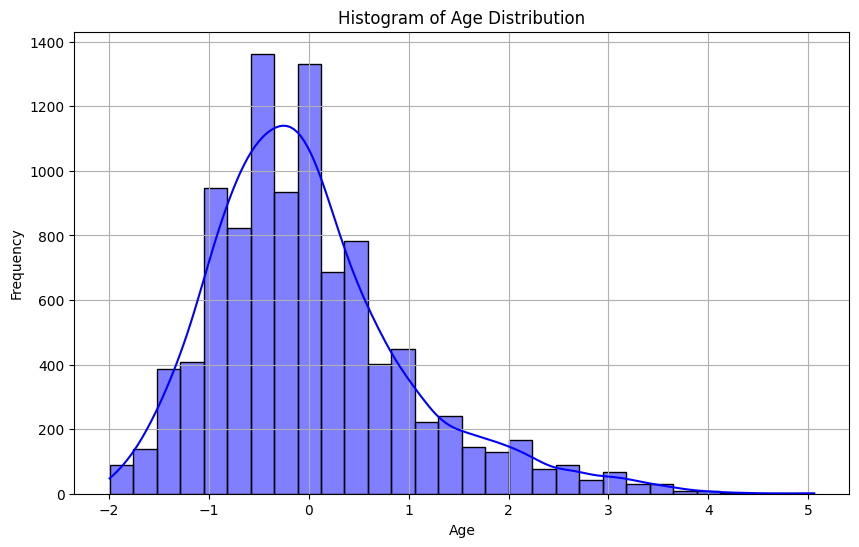

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_frame['Age'], bins=30, kde=True, color='blue')
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\legit\AppData\Local\Temp\ipykernel_13056\1945497237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_frame, x='Gender_Male', palette='pastel')


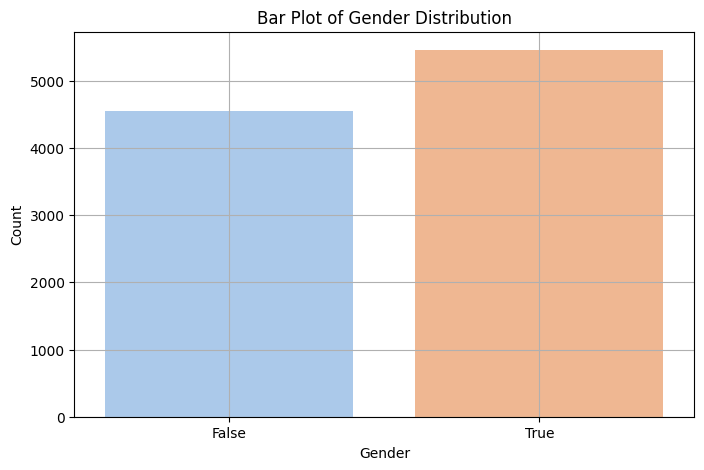

In [26]:
# Bar Plot of Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data_frame, x='Gender_Male', palette='pastel')
plt.title('Bar Plot of Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()


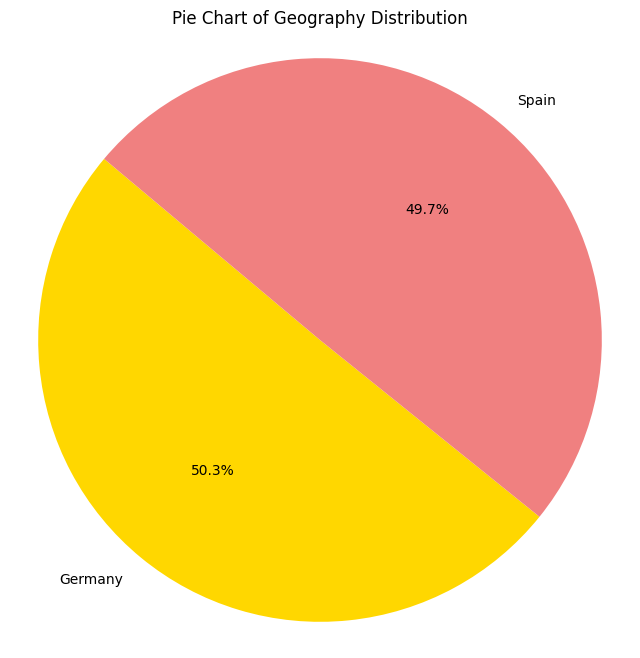

In [28]:
import matplotlib.pyplot as plt

# Pie Chart of Geography Distribution after one-hot encoding
plt.figure(figsize=(8, 8))

# Calculate values for the pie chart
labels = ['Germany', 'Spain']
sizes = [
    data_frame['Geography_Germany'].sum(),
    data_frame['Geography_Spain'].sum(),
]

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Pie Chart of Geography Distribution')
plt.axis('equal')
plt.show()


In [29]:
# Step 5: Model Selection and Implementation
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [30]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
# Step 6: Model Evaluation
# Logistic Regression
from sklearn.metrics import classification_report

# Predict the target values for the test set
y_pred = logreg.predict(X_test)

# Print the classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.21      0.30       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.60      2000
weighted avg       0.78      0.81      0.78      2000



In [35]:
# Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test)
# Print the classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1607
           1       0.53      0.38      0.45       393

    accuracy                           0.81      2000
   macro avg       0.70      0.65      0.67      2000
weighted avg       0.80      0.81      0.80      2000

